In [41]:
import numpy as np
import xml
import matplotlib.pyplot as plt

In [12]:
import xml.etree.ElementTree as et
tree = et.parse("walls.dae")
root = tree.getroot()

In [84]:
points = "8.216041 38.6137 18.88516 -18.05325 38.6137 18.88516 8.216041 38.6137 -12.37988 2.782208 38.6137 -12.37988 -43.43998 38.6137 -12.37988 -43.43998 38.6137 41.40468 -11.77235 38.6137 41.40468 -11.77235 38.6137 81.18934 31.24837 38.6137 81.18934 31.24837 38.6137 41.40468 8.216041 38.6137 41.40468 8.216041 38.6137 24.71702 -18.05325 38.6137 24.71702"
points = points.split()
points = np.array(list(map(float, points))).\
    reshape(len(points)//3, 3)

idx = "1 0 2 0 3 2 4 3 5 4 6 5 7 6 8 7 9 8 10 9 11 10 11 12 12 1"
idx = idx.split()
idx = np.array(list(map(int, idx))).reshape(len(idx)//2, 2)

xs = points[idx, 0].T
zs = points[idx, 2].T



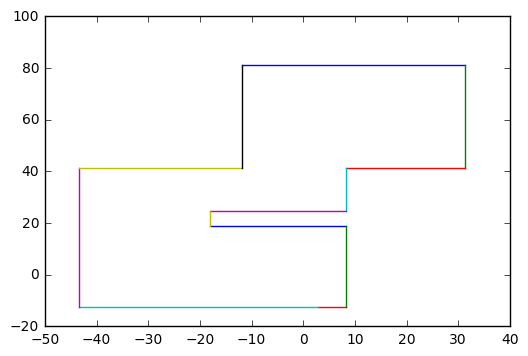

In [85]:
plt.plot(xs, zs)
plt.show()

In [93]:
def collide(x, z, vx, vz):
    trans_xs = xs - x
    trans_zs = zs - z
    x1 = trans_xs[0]
    x2 = trans_xs[1]
    z1 = trans_zs[0]
    z2 = trans_zs[1]
    
    denom = ((x1 - x2) * vz - (z1 - z2) * vx)
    
    t = ((-x2 * vz - -z2 * vx)) / denom
    a = ((x1 - x2) * -z2  - (z1 - z2) * - x2) / denom
    print (t)
    print(a)
    
    valid = np.logical_and(t > 0, np.logical_and(t < 1, a > 0))
    print (a[valid])
    
    

In [96]:
collide(0, 0, -1, 0)

[       -inf  0.60403441         inf         inf  0.23017535        -inf
 -1.04071971        -inf  2.04071971        -inf  2.48115554        -inf
 -3.2382739 ]
[       inf   8.216041       -inf       -inf -43.43998        -inf
 -11.77235        -inf  31.24837         inf   8.216041       -inf
 -18.05325 ]
[ 8.216041]


C:\Users\tgreer\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\tgreer\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in true_divide
